In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np


In [3]:
df = pd.read_csv('data/fire_eye_avg.csv')
#df.reset_index(drop=True, inplace=True)
df.drop(columns='index', inplace=True)
X = df.drop(columns=['fire_mask_next_day'])
y = df['fire_mask_next_day']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [4]:
# Fit a Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
accuracy_train = model.score(X_train, y_train)
accuracy = model.score(X_test, y_test)
print(f'Training Accuracy: {accuracy_train}', f'Accuracy: {accuracy}')

# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame for better readability
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

Training Accuracy: 1.0 Accuracy: 0.9650655021834061
                     Feature  Importance
3   energy_release_component    0.169339
8              drought_index    0.116189
0                  elevation    0.112046
4                 burn_index    0.108245
2                 wind_speed    0.056641
1             wind_direction    0.048358
6              tempature_min    0.047386
15             fire_mask_1_1    0.043863
7              tempature_max    0.042759
10        population_density    0.040505
17             fire_mask_2_0    0.038381
9                 vegetation    0.032602
18             fire_mask_2_1    0.028978
16             fire_mask_1_2    0.021573
14             fire_mask_1_0    0.021518
11             fire_mask_0_0    0.018143
19             fire_mask_2_2    0.018065
12             fire_mask_0_1    0.016031
13             fire_mask_0_2    0.013712
5              precipitation    0.005668


In [16]:
train_acc = []
test_acc = []



for i in range(1, 40):

    model = RandomForestClassifier(random_state=42, max_depth=i)
    model.fit(X_train, y_train)

    # Predict and evaluate
    train_acc.append(model.score(X_train, y_train))
    test_acc.append(model.score(X_test, y_test))






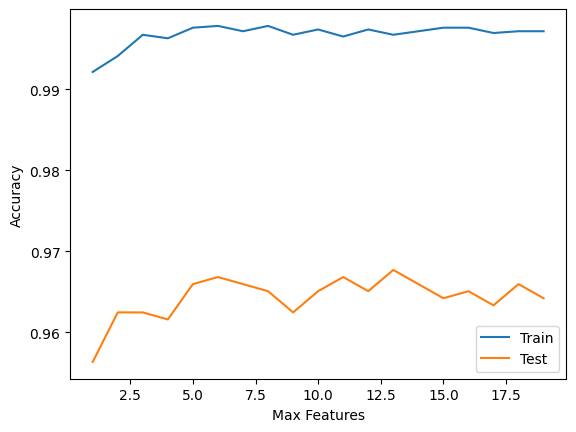

In [17]:
plt.plot(np.arange(1, 40), train_acc, np.arange(1, 40), test_acc)
plt.xlabel('Max Features')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'])

In [14]:
model = RandomForestClassifier(random_state=42, max_depth=19)
model.fit(X_train, y_train)

# Predict and evaluate
accuracy_train = model.score(X_train, y_train)
accuracy = model.score(X_test, y_test)
print(f'Training Accuracy: {accuracy_train}', f'Accuracy: {accuracy}')

# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame for better readability
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

Training Accuracy: 0.996284965034965 Accuracy: 0.9615720524017467
                     Feature  Importance
3   energy_release_component    0.170833
8              drought_index    0.115424
0                  elevation    0.111026
4                 burn_index    0.108877
2                 wind_speed    0.055313
1             wind_direction    0.046511
15             fire_mask_1_1    0.046265
6              tempature_min    0.044932
7              tempature_max    0.042080
17             fire_mask_2_0    0.039943
10        population_density    0.039916
9                 vegetation    0.029940
18             fire_mask_2_1    0.029611
16             fire_mask_1_2    0.022466
14             fire_mask_1_0    0.022375
19             fire_mask_2_2    0.019028
11             fire_mask_0_0    0.018429
12             fire_mask_0_1    0.017270
13             fire_mask_0_2    0.014111
5              precipitation    0.005650


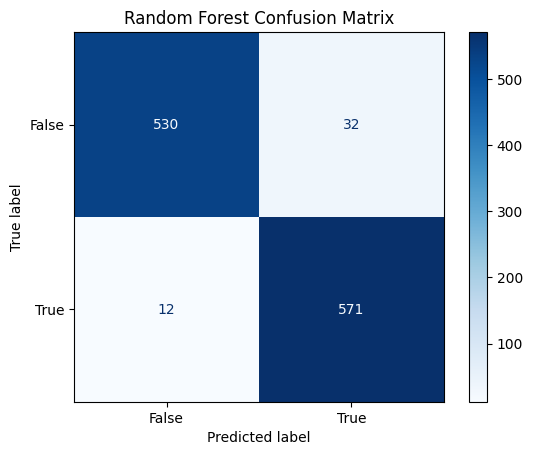

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(X_test)

# Generating the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Displaying the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Random Forest Confusion Matrix')
plt.show()

In [7]:

df = pd.read_csv('data/fire_eye_avg.csv')
#df.reset_index(drop=True, inplace=True)
df.drop(columns='index', inplace=True)
X = df.drop(columns=['fire_mask_next_day'])
y = df['fire_mask_next_day']

avg_list = []

for i in range(3):
    for j in range(3):
        avg_list.append(f'fire_mask_{i}_{j}')



X['fire_mask'] = X[avg_list].mean(axis=1)
X.drop(columns=avg_list, inplace=True)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = RandomForestClassifier(random_state=42, max_depth=19)
model.fit(X_train, y_train)

# Predict and evaluate
accuracy_train = model.score(X_train, y_train)
accuracy = model.score(X_test, y_test)
print(f'Training Accuracy: {accuracy_train}', f'Accuracy: {accuracy}')

# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame for better readability
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

Training Accuracy: 1.0 Accuracy: 0.9633187772925764
                     Feature  Importance
11                 fire_mask    0.228939
3   energy_release_component    0.138060
8              drought_index    0.117416
4                 burn_index    0.117371
0                  elevation    0.095756
2                 wind_speed    0.058836
6              tempature_min    0.054096
10        population_density    0.050563
1             wind_direction    0.049889
7              tempature_max    0.048766
9                 vegetation    0.034729
5              precipitation    0.005579
